In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# to create dataset
m = 30
theta0_true = 2
theta1_true = 0.5
X = np.linspace(-1,1,m)

rand_noise_mu = 0
rand_noise_std = 0.1

rand_noise = np.random.normal(rand_noise_mu, rand_noise_std, m)
Y = theta0_true + theta1_true * X + rand_noise  # Y = t1X + (t0 + rand_noise)

X [-1.         -0.93103448 -0.86206897 -0.79310345 -0.72413793 -0.65517241
 -0.5862069  -0.51724138 -0.44827586 -0.37931034 -0.31034483 -0.24137931
 -0.17241379 -0.10344828 -0.03448276  0.03448276  0.10344828  0.17241379
  0.24137931  0.31034483  0.37931034  0.44827586  0.51724138  0.5862069
  0.65517241  0.72413793  0.79310345  0.86206897  0.93103448  1.        ]
Y [1.54141858 1.46649294 1.71050398 1.62854104 1.74877942 1.63654023
 1.58154827 1.61262828 1.66396351 1.81614123 1.87536802 1.91152957
 1.92173253 1.81434787 2.0119392  1.97963118 2.05298572 2.13631038
 2.18732309 2.25135254 2.20452538 2.25619626 2.17978191 2.12611244
 2.12526727 2.32259545 2.32723028 2.49431367 2.53721974 2.56410942]


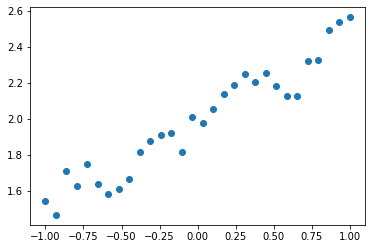

In [4]:
#print and plot the data
print('X',X)
print('Y',Y)

plt.scatter(X, Y)

In [5]:
#define the cost/loss function and gradient descent function

def cost_MSE(theta0,theta1,X,Y):
    hypothesis = theta0 + theta1*X
    m = len(X)
    return (1/(2.0*m))*((np.square(hypothesis-Y)).sum(axis=0))  # SUM (1/2m * sqrt(hypothesis-Y))


def gradientDescent(theta0,theta1,X,Y,iterations,alpha):
    count = 1
    cost_log = np.array([])
    m = len(X)
    
    # the actual gradient descent bit
    while(count <= iterations):
        hypothesis = theta0 + theta1*X
        theta0 = theta0 - alpha*(1.0/m)*((hypothesis-Y)).sum(axis=0)  # in notes, delta theta = ...; delta is CHANGE IN so theta = theta - .... is appropriate
        theta1 = theta1 - alpha*(1.0/m)*((hypothesis-Y)*X).sum(axis=0)
        cost_log = np.append(cost_log,cost_MSE(theta0,theta1,X,Y))
        count = count + 1
        
    plt.subplot(121)  # same as 1, 2, 1. one row, two columns. filling graphs in from the first graph in the upper left
    plt.plot(np.linspace(1,iterations,iterations,endpoint=True),cost_log) # y is cost_log, x is the linear space including the final iteration
    plt.title("Cost/Loss wrt iteration")
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost/Loss")
    
    
    plt.subplot(122)  # the following graph will be second along the first row
    plt.scatter(X, Y) # create dots of Y against X
    plt.plot(X, theta0 + theta1*X)  # linear regression of the final y = t1X + t0 against X
    plt.show()
    
    
    return theta0,theta1

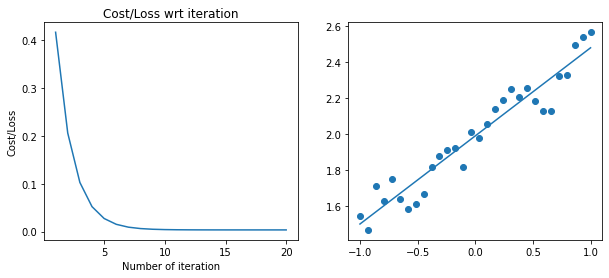

theta0: 1.9885126119788272
theta1: 0.4892452698246867


In [6]:
alpha = 0.3 # learning rate
iterations = 20

Thetas_Init = np.random.rand(2)  # 2 thetas [0, 1) in a singular array

plt.figure(figsize=(10, 4))  # figure will be ten inches width, 4 inches height

theta0,theta1 = gradientDescent(Thetas_Init[0],Thetas_Init[1], X, Y,iterations,alpha)
print('theta0:', theta0)
print('theta1:', theta1)